<a href="https://colab.research.google.com/github/kaushal3312/Linear-Regression-using-Tensorflow-and-Scikit-Learn-/blob/main/Regression_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import library python

In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print(tf.__version__)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

data = pd.read_csv('https://raw.githubusercontent.com/kaushal3312/Linear-Regression-using-Tensorflow-and-Scikit-Learn-/main/car.csv')
data.head()



Instructions for updating:
non-resource variables are not supported in the long term
2.3.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#**EDA**

In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [6]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
data.shape

(11914, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Dealing with NAN

In [10]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [12]:
data.dropna(inplace=True,axis=0)

In [13]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

# Dealing Outlier 

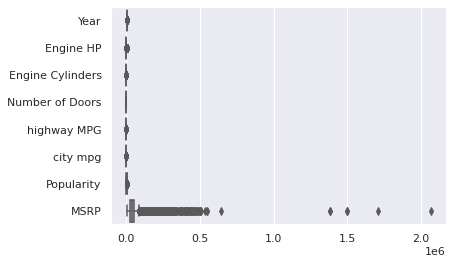

In [14]:
sns.boxplot(data=data,orient='h',palette='Set2')

In [15]:
data['new msrp'] = np.log1p(data.MSRP)
data.drop('MSRP', axis=1, inplace=True)

In [16]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,new msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,10.739349
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,10.612779
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,10.500977
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,10.290483
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,10.448744


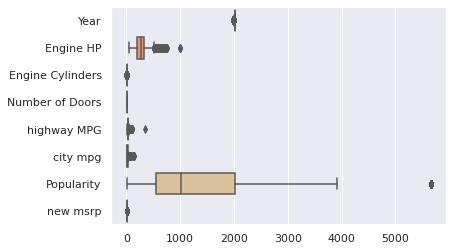

In [17]:
sns.boxplot(data=data,orient='h',palette='Set2')

In [18]:
q1, q3 = np.percentile(data['Popularity'],[25,75])
iqr = q3-q1
whisker = q3 + (1.5 * iqr)
print(whisker)

4199.0


In [19]:
data['Popularity'] = data['Popularity'].clip(upper=whisker)

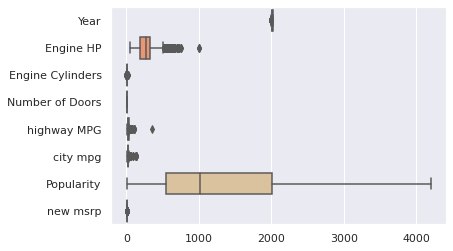

In [20]:
sns.boxplot(data=data,orient='h',palette='Set2')

# **creating Label Encoder for categorical variables**

In [21]:
# For Label Encoder data types need to be cat 
columns_to_convert=['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style']
data[columns_to_convert] = data[columns_to_convert].astype('category')

In [22]:
data.dtypes


Make                 category
Model                category
Year                    int64
Engine Fuel Type     category
Engine HP             float64
Engine Cylinders      float64
Transmission Type    category
Driven_Wheels        category
Number of Doors       float64
Market Category      category
Vehicle Size         category
Vehicle Style        category
highway MPG             int64
city mpg                int64
Popularity              int64
new msrp              float64
dtype: object

In [23]:
 # Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for col in ['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style']: data[col] = label_encoder.fit_transform(data[col])


In [24]:
data.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,new msrp
0,4,1,2011,6,335.0,6.0,3,3,2.0,37,0,8,26,19,3916,10.739349
1,4,0,2011,6,300.0,6.0,3,3,2.0,66,0,6,28,19,3916,10.612779
2,4,0,2011,6,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,10.500977
3,4,0,2011,6,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,10.290483
4,4,0,2011,6,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,10.448744


In [25]:
data.shape

(8084, 16)

#correaltion





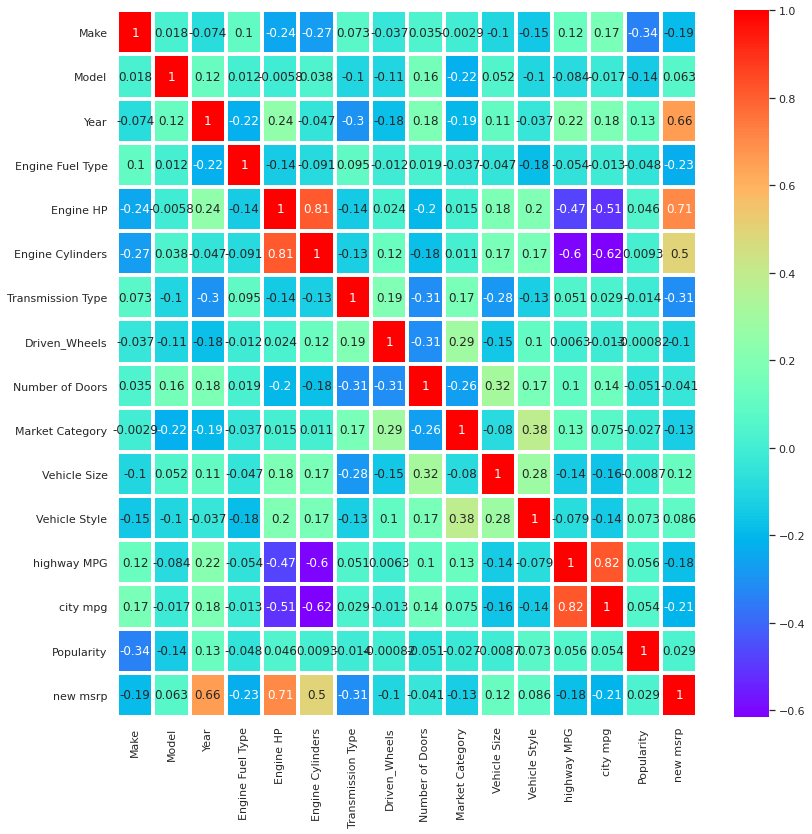

In [26]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='rainbow',linewidths=3)


In [27]:
X = data.corr()
X['new msrp'].sort_values(ascending=False)

new msrp             1.000000
Engine HP            0.705369
Year                 0.658258
Engine Cylinders     0.496731
Vehicle Size         0.117713
Vehicle Style        0.086207
Model                0.062594
Popularity           0.028981
Number of Doors     -0.040657
Driven_Wheels       -0.100777
Market Category     -0.134591
highway MPG         -0.179530
Make                -0.186651
city mpg            -0.208235
Engine Fuel Type    -0.229984
Transmission Type   -0.307729
Name: new msrp, dtype: float64

In [28]:
xy = ['new msrp','Engine HP','Year','Engine Cylinders']
data_ve = data[xy]
New_data = data.copy()
data_ve.head()


,new msrp,Engine HP,Year,Engine Cylinders
0,10.739349,335.0,2011,6.0
1,10.612779,300.0,2011,6.0
2,10.500977,300.0,2011,6.0
3,10.290483,230.0,2011,6.0
4,10.448744,230.0,2011,6.0


MODEL CREATION 

In [29]:
FEATURES = ['Engine HP', 'Year', 'Engine Cylinders'] 
LABEL = 'new msrp'

In [30]:
PKS = [tf.feature_column.numeric_column(k) for k in FEATURES] 
PKS

[NumericColumn(key='Engine HP', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Year', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Engine Cylinders', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [31]:
# Defining the estimator 

estimator = tf.estimator.LinearRegressor( feature_columns=PKS, model_dir="ABC")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'ABC', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True): 
    return tf.compat.v1.estimator.inputs.pandas_input_fn( x=pd.DataFrame({k: data_set[k].values for k in FEATURES}),
                                               y = pd.Series(data_set[LABEL].values), batch_size=n_batch, num_epochs=num_epochs, shuffle=shuffle)

In [33]:
# MODEL TRAINIUNG 

df_train=data_ve.sample(frac=0.8,random_state=200) 
df_test=data_ve.drop(df_train.index) 
print(df_train.shape, df_test.shape)

(6467, 4) (1617, 4)


In [34]:
estimator.train(input_fn=get_input_fn(df_train, num_epochs=None, n_batch = 128, shuffle=False), steps=1000)


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into ABC/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 13804.124, step = 1
INFO:tensorflow:global_step/sec: 54

In [35]:
# MODEL EVALUATION 

ev = estimator.evaluate( input_fn=get_input_fn(df_test, num_epochs=1, n_batch = 128, shuffle=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-08T20:10:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ABC/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.18926s
INFO:tensorflow:Finished evaluation at 2020-11-08-20:10:34
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.42542925, global_step = 1000, label/mean = 10.434884, loss = 52.916855, prediction/mean = 10.36995
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: ABC/model.ckpt-1000


In [36]:
# R square 

y = estimator.predict(    
         input_fn=get_input_fn(df_test,                          
         num_epochs=1,                          
         n_batch = 256,                          
         shuffle=False))

In [37]:
import itertools

predictions = list(p["predictions"] for p in itertools.islice(y, 1871))
#print("Predictions: {}".format(str(predictions)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ABC/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [41]:
predictions

[array([10.509], dtype=float32),
 array([9.679], dtype=float32),
 array([9.679], dtype=float32),
 array([9.597], dtype=float32),
 array([10.648], dtype=float32),
 array([10.241], dtype=float32),
 array([9.859], dtype=float32),
 array([9.859], dtype=float32),
 array([10.502], dtype=float32),
 array([9.863], dtype=float32),
 array([9.863], dtype=float32),
 array([9.867], dtype=float32),
 array([9.867], dtype=float32),
 array([9.355], dtype=float32),
 array([9.359], dtype=float32),
 array([9.359], dtype=float32),
 array([10.241], dtype=float32),
 array([9.835], dtype=float32),
 array([9.835], dtype=float32),
 array([9.84], dtype=float32),
 array([10.19], dtype=float32),
 array([10.19], dtype=float32),
 array([9.84], dtype=float32),
 array([9.84], dtype=float32),
 array([9.844], dtype=float32),
 array([9.844], dtype=float32),
 array([9.704], dtype=float32),
 array([9.381], dtype=float32),
 array([9.386], dtype=float32),
 array([10.006], dtype=float32),
 array([9.708], dtype=float32),
 arra

In [42]:
import numpy as np

conc = np.vstack(predictions)
conc

array([[10.509],
       [ 9.679],
       [ 9.679],
       ...,
       [10.032],
       [10.522],
       [10.527]], dtype=float32)

In [43]:
ZHP = pd.DataFrame(conc)
ZHP.rename(columns={0:'y_pred'}, inplace=True)

kot = ZHP['y_pred'].values
kot = kot.astype('float32')
kot.dtype

dtype('float32')

In [44]:
y = df_test['new msrp'].values
y = y.astype('float32')
y.dtype

dtype('float32')

In [45]:
PZU = pd.DataFrame({'y': y, 'y_pred': kot })
PZU.dtypes

y         float32
y_pred    float32
dtype: object

In [46]:
def R_squared(y, y_pred):
    
  residual = tf.reduce_sum(tf.square(tf.subtract(y,y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.div(residual, total))
  return r2

In [47]:
y.dtype


dtype('float32')

In [48]:
kot.dtype


dtype('float32')

In [49]:
residual = tf.reduce_sum(tf.square(tf.subtract(y,kot)))


In [50]:
total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))


In [51]:
r2 = tf.subtract(1.0, tf.div(residual, total))


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [52]:
r2


<tf.Tensor 'Sub_2:0' shape=() dtype=float32>

In [53]:
sess = tf.Session()
a = sess.run(r2)
print('R Square parameter: ',a)

R Square parameter:  0.54184985
